<a href="https://colab.research.google.com/github/heman2402/Melanoma-Detection/blob/main/Melanoma_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem statement:** : To build a CNN based model which can accurately detect melanoma.

*   Melanoma is a type of cancer, that can be deadly, if not detected early and accounts for 75% of skin cancer deaths.
*   A lot of manual effort, needed in diagnosis, and lifes can be saved proided a soution can efficiently evaluate images.

**Import Required Libraries**

In [3]:
import pathlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
import PIL

**Map Google Drive**

In [4]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


**1. Data Reading/Data Understanding →**
Defining the path for train and test images

In [5]:
dir_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train")
dir_test = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Test")

In [6]:
count_train = len(list(dir_train.glob('*/*.jpg')))
print("Total Images for Train Dataset: ",count_train)

count_test = len(list(dir_test.glob('*/*.jpg')))
print("Total Images for Test Dataset: ",count_test)

Total Images for Train Dataset:  2239
Total Images for Test Dataset:  118


1.   There are 2357 total images
2.  2239 images are under Train Folder (distributed for 9 classes)
3.   118 images are under Train Folder (distributed for 9 classes)






**2. Dataset Creation →**
Create train & validation dataset from the train directory with a batch size of 32. Also, make sure you resize your images to 180*180.

Keeping validation dataset @ 20%

In [7]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


**3. Dataset visualisation →** Create a code to visualize one instance of all the nine classes present in the dataset

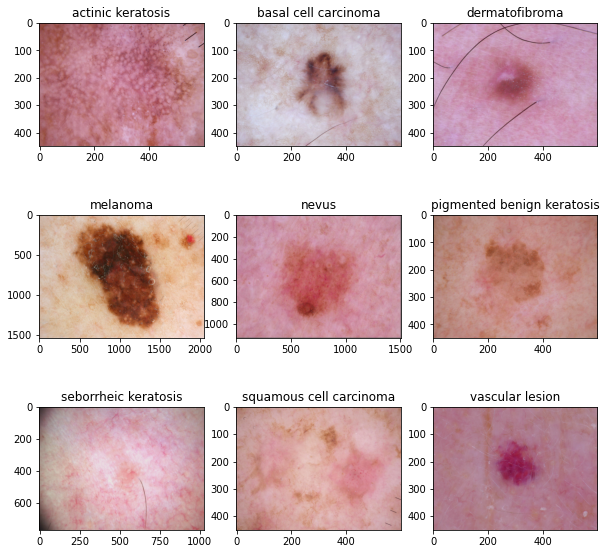

In [9]:
class_names = train_ds.class_names

plt.figure(figsize=(10,10))
for i in range(9): 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

**4. Model Building & training :**

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

4a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

In [11]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

4b. Choose an appropriate optimiser and loss function for model training

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                    

4c. Train the model for ~20 epochs

In [15]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 261s 944ms/step - loss: 2.0577 - accuracy: 0.1847 - val_loss: 1.9936 - val_accuracy: 0.2729
Epoch 2/20
56/56 [==============================] - 4s 76ms/step - loss: 1.9820 - accuracy: 0.2433 - val_loss: 1.9163 - val_accuracy: 0.3199
Epoch 3/20
56/56 [==============================] - 4s 76ms/step - loss: 1.9209 - accuracy: 0.2645 - val_loss: 1.8648 - val_accuracy: 0.2864
Epoch 4/20
56/56 [==============================] - 4s 76ms/step - loss: 1.8378 - accuracy: 0.3192 - val_loss: 1.7478 - val_accuracy: 0.3423
Epoch 5/20
56/56 [==============================] - 4s 76ms/step - loss: 1.7725 - accuracy: 0.3477 - val_loss: 1.7739 - val_accuracy: 0.3669
Epoch 6/20
56/56 [==============================] - 4s 76ms/step - loss: 1.6606 - accuracy: 0.4018 - val_loss: 1.5929 - val_accuracy: 0.4116
Epoch 7/20
56/56 [==============================] - 4s 76ms/step - loss: 1.5787 - accuracy: 0.4314 - val_loss: 1.6067 - val_accuracy: 0.4295
Epoch 8/20
56/56 [===

4d. Findings after the model fit. Checking if there is any evidence of model overfit or underfit.

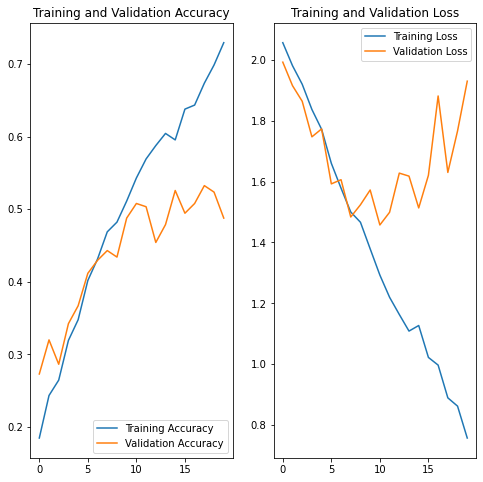

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**5. Chose an appropriate data augmentation strategy to resolve underfitting/overfitting**

In [17]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

**6. Model Building & training on the augmented data :**

6a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).

In [18]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ data_augument,
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

6b. Choose an appropriate optimiser and loss function for model training

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

6c. Train the model for ~20 epochs

In [20]:
epochs=20

history = model.fit(
  train_ds,
  validation_data = val_ds,
  epochs = epochs
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 9s 92ms/step - loss: 2.0551 - accuracy: 0.1920 - val_loss: 2.0394 - val_accuracy: 0.1924
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0343 - accuracy: 0.1936 - val_loss: 2.0383 - val_accuracy: 0.2058
Epoch 3/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0224 - accuracy: 0.1975 - val_loss: 2.0288 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 5s 86ms/step - loss: 2.0210 - accuracy: 0.1970 - val_loss: 2.0282 - val_accuracy: 0.1521
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 2.1364 - accuracy: 0.2126 - val_loss: 2.0241 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 5s 87ms/step - loss: 2.0609 - accuracy: 0.1975 - val_loss: 2.0276 - val_accuracy: 0.1946
Epoch 7/20
56/56 [==============================] - 5s 88ms/step - loss: 2.0278 - accuracy: 0.1970 - val_loss: 2.0351 - val_accuracy: 0.1924
Epoch 8/20
56/56 [======

6d. Findings after the model fit, to ascertain if the earlier issue is resolved or not?

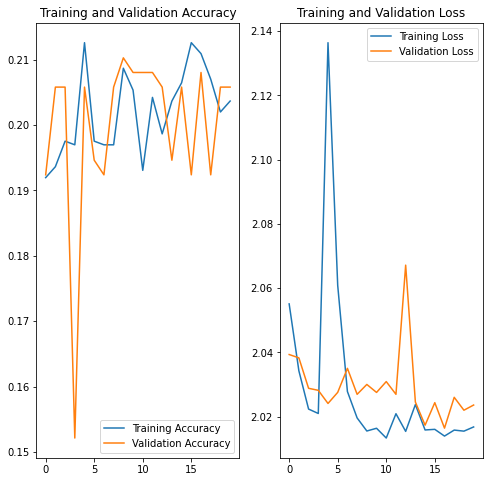

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**7. Class distribution:** Examine the current class distribution in the training dataset

In [25]:
path_list = []
label_list = []

for i in class_names:      
    for j in dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        label_list.append(i)

dataframe_dict_original = dict(zip(path_list, label_list))

original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df.head()

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis


In [27]:
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

7a. Class with least number of samples:
**Seborrheic Keratosis & Dermatofibroma have least number of samples i.e. 77 & 95 respectiely**

7b. Classes that dominate the data, in terms of the proportionate number of samples:
**Pigmented Benign Keratosis & Melanoma tops the chart with sample size of 462 and 438 respectively**

**8. Handling class imbalances:** Rectify class imbalances present in the training dataset with Augmentor library

In [29]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import Augmentor

dir_train = "/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/"

for i in class_names:
    p = Augmentor.Pipeline(dir_train + i)

    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    p.sample(600) ## Creating 600 images for each class type 

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F7050187290>: 100%|██████████| 600/600 [00:23<00:00, 25.72 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70500CCD50>: 100%|██████████| 600/600 [00:21<00:00, 27.51 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F705060B990>: 100%|██████████| 600/600 [00:22<00:00, 26.38 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F6FCAA76D10>: 100%|██████████| 600/600 [01:59<00:00,  5.04 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F705060B210>: 100%|██████████| 600/600 [01:35<00:00,  6.31 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F6FE20C3C10>: 100%|██████████| 600/600 [00:21<00:00, 27.46 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F70606F4950>: 100%|██████████| 600/600 [00:51<00:00, 11.71 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F6FE2082210>: 100%|██████████| 600/600 [00:22<00:00, 26.62 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F70500DABD0>: 100%|██████████| 600/600 [00:24<00:00, 24.75 Samples/s]


**All Output Folders from
/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/<folders>/output/<img>.jpg 
have been manuallay moved to 
/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/output/<folder>/<img>.jpg**

In [46]:
aug_data_train = pathlib.Path("/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/Output")

aug_count_train = len(list(aug_data_train.glob('*/output/*.jpg')))
print(aug_count_train)

5400


**Total Image count for train set has been soared to 5400 images**

In [53]:
path_list_aug = []
label_list_aug = []

for i in class_names:
    for j in aug_data_train.glob(i+'/output/*.jpg'):
        path_list_aug.append(str(j))
        label_list_aug.append(i)

dataframe_dict_aug = dict(zip(path_list_aug, label_list_aug))
augmented_df = pd.DataFrame(list(dataframe_dict_aug.items()),columns = ['Path','Label'])

augmented_df.head()

,Path,Label
0,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
1,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
2,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
3,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis
4,/content/gdrive/MyDrive/Colab Notebooks/Melano...,actinic keratosis


In [54]:
augmented_df['Label'].value_counts()

actinic keratosis             600
basal cell carcinoma          600
dermatofibroma                600
melanoma                      600
nevus                         600
pigmented benign keratosis    600
seborrheic keratosis          600
squamous cell carcinoma       600
vascular lesion               600
Name: Label, dtype: int64

**Class disbalance has been successfully removed**

**9. Model Building & training on the rectified class imbalance data :**

9a. Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).

In [56]:
batch_size = 32
img_height = 180
img_width = 180

aug_data_train

PosixPath('/content/gdrive/MyDrive/Colab Notebooks/Melanoma-Detection/Skin_Cancer_ISIC/Train/Output')

In [57]:
## Train and Validation Split

aug_train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  aug_data_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 5400 files belonging to 9 classes.
Using 4320 files for training.


In [58]:
aug_val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  aug_data_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 5400 files belonging to 9 classes.
Using 1080 files for validation.


In [59]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([ 
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))
      
])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(num_classes, activation = "softmax"))

9b. Choose an appropriate optimiser and loss function for model training

In [60]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

9c. Train the model for ~30 epochs

In [61]:
epochs =30

aug_history = model.fit(
  aug_train_ds,
  validation_data = aug_val_ds,
  epochs = epochs
)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


135/135 [==============================] - 26s 178ms/step - loss: 2.1264 - accuracy: 0.1537 - val_loss: 1.8210 - val_accuracy: 0.2630
Epoch 2/30
135/135 [==============================] - 22s 157ms/step - loss: 1.7165 - accuracy: 0.3257 - val_loss: 1.5322 - val_accuracy: 0.4120
Epoch 3/30
135/135 [==============================] - 22s 158ms/step - loss: 1.5845 - accuracy: 0.3796 - val_loss: 1.6454 - val_accuracy: 0.3602
Epoch 4/30
135/135 [==============================] - 23s 164ms/step - loss: 1.4913 - accuracy: 0.4148 - val_loss: 1.5561 - val_accuracy: 0.3898
Epoch 5/30
135/135 [==============================] - 24s 168ms/step - loss: 1.4051 - accuracy: 0.4558 - val_loss: 1.3816 - val_accuracy: 0.4519
Epoch 6/30
135/135 [==============================] - 22s 156ms/step - loss: 1.2929 - accuracy: 0.5144 - val_loss: 1.2702 - val_accuracy: 0.5333
Epoch 7/30
135/135 [==============================] - 22s 155ms/step - loss: 1.4921 - accuracy: 0.4678 - val_loss: 1.3120 - val_accuracy: 0.5

9d. Findings after the model fit and ascertaining whether issues are resolved or not

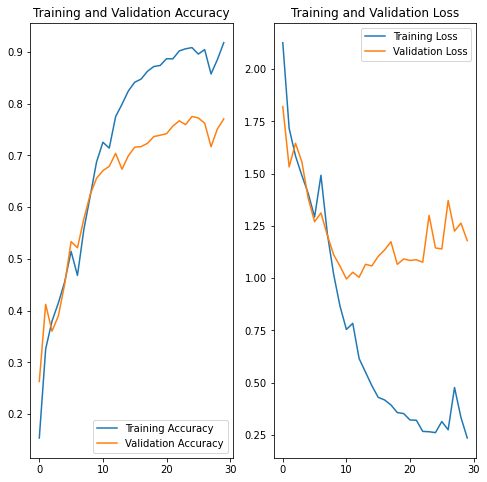

In [62]:
acc = aug_history.history['accuracy']
val_acc = aug_history.history['val_accuracy']

loss = aug_history.history['loss']
val_loss = aug_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# **OUTPUT**
1. Accuracy has increase significantly, however overfitting issue persists.

2. Loss has also reduced, however still high for validation set.